[View in Colaboratory](https://colab.research.google.com/github/attrigirish/python-ml/blob/master/KMeans_classifier.ipynb)

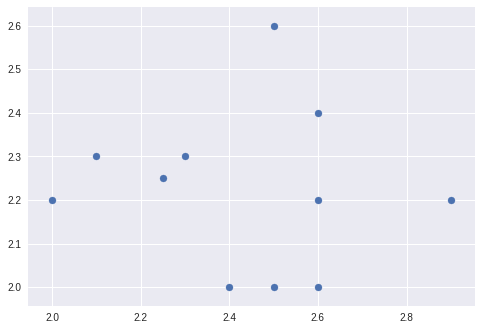

In [40]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[2.9, 2.2],
              [2.6,2.4],
              [2.3, 2.3],
              [2.5, 2.6],
              [2.1, 2.3 ],              
              [2.4, 2],
              [2.6,2],
              [2.6,2.2],
              [2,2.2],
             [2.5,2.0],
             [2.25,2.25]])

plt.scatter(X[:,0], X[:,1])
plt.show()

In [41]:
class K_Means:
  
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self,data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        print("Centroids : ", self.centroids)
            
        for i in range(self.max_iter):
            print("Iteration Number : ", (i+1))
            
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []
                              
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                print("Feature : ", featureset,"Distances : ", distances, end="\t")
                classification = distances.index(min(distances))
                print("Class : ", classification)
                self.classifications[classification].append(featureset)
                             
            print("Iteration : ", i, "\t", "Classifications : ", self.classifications)
                        

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            
            print("New Centroids : ", self.centroids)            
            
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
                
            #Fit function ends here
            print("-"*30)

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
      
      
clf = K_Means()
clf.fit(X)


Centroids :  {0: array([2.9, 2.2]), 1: array([2.6, 2.4])}
Iteration Number :  1
Feature :  [2.9 2.2] Distances :  [0.0, 0.3605551275463986]	Class :  0
Feature :  [2.6 2.4] Distances :  [0.3605551275463986, 0.0]	Class :  1
Feature :  [2.3 2.3] Distances :  [0.608276253029822, 0.3162277660168382]	Class :  1
Feature :  [2.5 2.6] Distances :  [0.5656854249492379, 0.22360679774997916]	Class :  1
Feature :  [2.1 2.3] Distances :  [0.8062257748298547, 0.5099019513592785]	Class :  1
Feature :  [2.4 2. ] Distances :  [0.5385164807134505, 0.4472135954999579]	Class :  1
Feature :  [2.6 2. ] Distances :  [0.3605551275463989, 0.3999999999999999]	Class :  0
Feature :  [2.6 2.2] Distances :  [0.2999999999999998, 0.19999999999999973]	Class :  1
Feature :  [2.  2.2] Distances :  [0.8999999999999999, 0.6324555320336759]	Class :  1
Feature :  [2.5 2. ] Distances :  [0.4472135954999579, 0.41231056256176596]	Class :  1
Feature :  [2.25 2.25] Distances :  [0.6519202405202648, 0.3807886552931955]	Class :  1


453.3333333333334
102.72108843537411


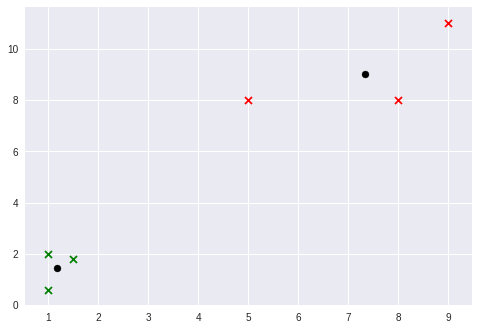

In [8]:
clf = K_Means()
clf.fit(X)

colors = ["g","r"]

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],marker="o", color="k")

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color)